In [56]:
%matplotlib inline
import lightgbm as lgb
from sklearn import model_selection
from sklearn.metrics import *
import datetime
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import *
from imblearn.over_sampling import *
from collections import Counter
from sklearn.svm import SVC

train = pd.read_csv('data/train_final_ordinal')
test = pd.read_csv('data/test_final_ordinal')

In [57]:
X = train.drop(['msno','is_churn'], axis=1)
y = train['is_churn']
X_test = test.drop(['msno', 'is_churn'], axis=1)
y_test = test['is_churn']

In [29]:
categoric_list = ['payment_method_id', 'payment_plan_days', 'is_auto_renew', 'is_cancel', 'gender', 'city', 'registered_via', 'disc_user']

# RandomOverSampling

In [55]:
lgb_params = {
   'learning_rate': 0.01,
   'application': 'binary',
   'max_depth': 4,
   'num_leaves': 128,
   'verbosity': -1,
   'metric': 'binary_logloss',
   'feature_fraction': 0.6,
}

X, y = RandomOverSampler(random_state=0).fit_sample(X_train, Y_train)
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 7)


d_train = lgb.Dataset(X, label = y)
d_valid = lgb.Dataset(X_validation, label = Y_validation)

watchlist = [d_train, d_valid]

model = lgb.train(lgb_params, train_set = d_train,  num_boost_round = 1000, valid_sets = watchlist, 
                  early_stopping_rounds = 100, verbose_eval = 100)

Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 0.382573	valid_1's binary_logloss: 0.382374
[200]	training's binary_logloss: 0.273404	valid_1's binary_logloss: 0.273247
[300]	training's binary_logloss: 0.221147	valid_1's binary_logloss: 0.221017
[400]	training's binary_logloss: 0.18322	valid_1's binary_logloss: 0.182721
[500]	training's binary_logloss: 0.163554	valid_1's binary_logloss: 0.162931
[600]	training's binary_logloss: 0.152791	valid_1's binary_logloss: 0.152119
[700]	training's binary_logloss: 0.143856	valid_1's binary_logloss: 0.143101
[800]	training's binary_logloss: 0.136616	valid_1's binary_logloss: 0.135837
[900]	training's binary_logloss: 0.131434	valid_1's binary_logloss: 0.130682
[1000]	training's binary_logloss: 0.12665	valid_1's binary_logloss: 0.125912
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.12665	valid_1's binary_logloss: 0.125912


In [51]:
result = model.predict(X_test)

In [53]:
result_df = pd.DataFrame(columns=['msno', 'is_churn'])

result_df['msno'] = test['msno']

result_df['is_churn'] = result

result_df

,msno,is_churn
0,4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=,0.105736
1,aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=,0.105294
2,rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=,0.120531
3,WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=,0.105736
4,aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=,0.151372
5,nu1jZ/flvSaXRg0U9Es+xmo2KlAXq/q+mhcWFStwm9w=,0.487383
6,biDTtgK83fEWXJDaxzD1eh22dion/h3odeIbS7qJMmY=,0.185301
7,k/8uwi/iM9LZmRAIWXLqpZY6ENomXAscwsQsh6PxcTw=,0.071130
8,18rQ/746SjA6nBx325UsyhfsDhu4tK01FXFxHWZjw20=,0.163882
9,2V13OCoWx6vqKr/ZzNmKFrmnC2FtR4SWMz5C5Hi02PY=,0.179558


In [54]:
result_df.to_csv('llllaaaa', index=False)

In [49]:
ls = []
for i in result:
    if i >= 0.5:
        ls.append(1)
    else:
        ls.append(0)

In [50]:
print(classification_report(Y_validation, ls))

             precision    recall  f1-score   support

          0       0.88      0.97      0.92    112392
          1       0.97      0.87      0.91    111938

avg / total       0.92      0.92      0.92    224330



In [70]:
lgb_params = {
   'learning_rate': 0.005,
   'application': 'binary',
   'max_depth': 2,
   'num_leaves': 128,
   'verbosity': -1,
   'metric': 'binary_logloss',
   'feature_fraction': 0.6,
}


X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 7)

d_train = lgb.Dataset(X, label = y)
d_valid = lgb.Dataset(X_validation, label = Y_validation)

watchlist = [d_train, d_valid]

model = lgb.train(lgb_params, train_set = d_train,  num_boost_round = 1000, valid_sets = watchlist, early_stopping_rounds = 100, verbose_eval = 100)

Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 0.396746	valid_1's binary_logloss: 0.39683
[200]	training's binary_logloss: 0.255713	valid_1's binary_logloss: 0.255726
[300]	training's binary_logloss: 0.181487	valid_1's binary_logloss: 0.181371
[400]	training's binary_logloss: 0.140756	valid_1's binary_logloss: 0.14057
[500]	training's binary_logloss: 0.11712	valid_1's binary_logloss: 0.116953
[600]	training's binary_logloss: 0.10268	valid_1's binary_logloss: 0.102516
[700]	training's binary_logloss: 0.0926981	valid_1's binary_logloss: 0.0925333
[800]	training's binary_logloss: 0.086311	valid_1's binary_logloss: 0.0861841
[900]	training's binary_logloss: 0.0819634	valid_1's binary_logloss: 0.081886
[1000]	training's binary_logloss: 0.0782641	valid_1's binary_logloss: 0.0781791
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.0782641	valid_1's binary_logloss: 0.0781791


In [83]:
result111 = model.predict(X_test)

In [84]:
result111_df = pd.DataFrame(columns=['msno', 'is_churn'])

result111_df['msno'] = test['msno']

result111_df['is_churn'] = result111

result111_df

,msno,is_churn
0,4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=,0.014432
1,aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=,0.018481
2,rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=,0.016253
3,WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=,0.014432
4,aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=,0.016738
5,nu1jZ/flvSaXRg0U9Es+xmo2KlAXq/q+mhcWFStwm9w=,0.058179
6,biDTtgK83fEWXJDaxzD1eh22dion/h3odeIbS7qJMmY=,0.019730
7,k/8uwi/iM9LZmRAIWXLqpZY6ENomXAscwsQsh6PxcTw=,0.014432
8,18rQ/746SjA6nBx325UsyhfsDhu4tK01FXFxHWZjw20=,0.018934
9,2V13OCoWx6vqKr/ZzNmKFrmnC2FtR4SWMz5C5Hi02PY=,0.019413


In [73]:
result111_df.to_csv('sajvndsjvsdknv', index=False)

In [62]:
resu = model.predict(X_validation)

In [63]:
ls = []
for i in resu:
    if i >= 0.5:
        ls.append(1)
    else:
        ls.append(0)

In [65]:
print(classification_report(Y_validation,ls))

             precision    recall  f1-score   support

          0       0.98      0.99      0.99    174985
          1       0.90      0.68      0.77     11731

avg / total       0.97      0.98      0.97    186716



In [85]:
model.feature_importance()

array([156, 155, 350, 424, 485, 700, 526,  63,  14,   5,   0,   1,  12,
         9,   0,   2,  71,   8,   1,  18])

In [86]:
model.feature_name()

['payment_method_id',
 'payment_plan_days',
 'actual_amount_paid',
 'is_auto_renew',
 'transaction_date',
 'membership_expire_date',
 'is_cancel',
 'num_unq',
 'total_secs',
 'city',
 'gender',
 'registered_via',
 'registration_init_time',
 'age',
 'pro_25',
 'pro_50',
 'pro_75',
 'pro_985',
 'pro_100',
 'disc_user']

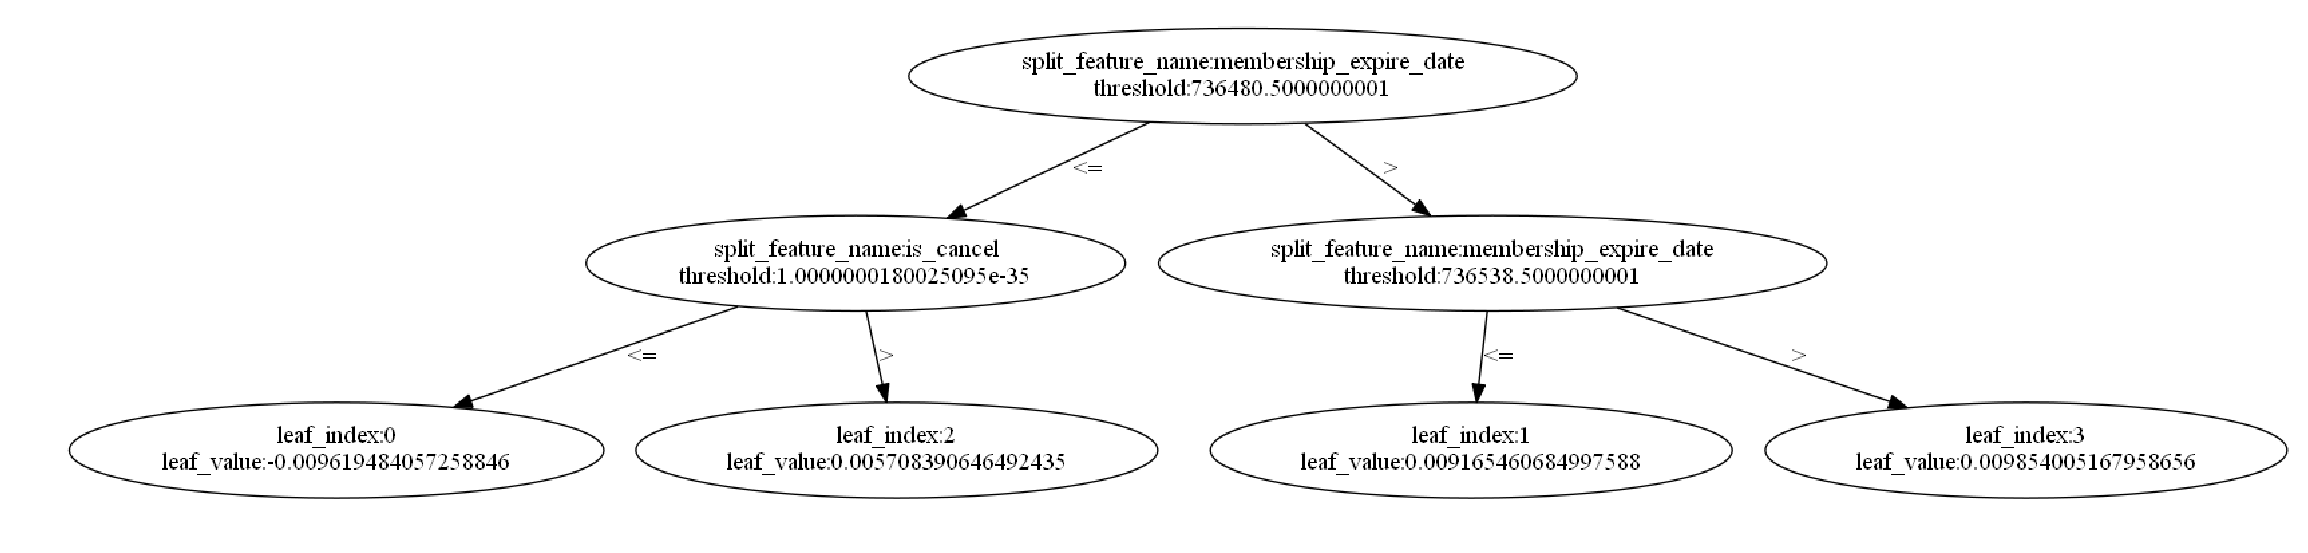

In [98]:
import lightgbm.plotting as lgbp

lgbp.plot_tree(model, figsize=(20,20))